In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import multivariate_normal
import copy

C:\Users\ANTOINE\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


#### This is the implementaion of the extension "Multivariate Density Forecasts"

## GARCH process simulated

In [2]:
def simulated_GARCH_multi_dim(dim,n,w,alpha,beta):
    sigma_wn = np.diag(([1.0]*dim))
    #print(sigma_wn)
    y = np.zeros((dim,n))
    sigma2 = np.zeros((dim,n))
    for j in range(dim):
        sigma2[j,0] = 1
    for i in range(1,n):
        covariance_matrix = copy.deepcopy(sigma_wn)
        sigma2[:,i] = w + np.dot(alpha,y[:,i-1]**2) + np.dot(beta,sigma2[:,i-1])
        #print(covariance_matrix)
        for j in range(dim):
            #print('sigma2:',sigma2[:,i])
            covariance_matrix[j,j] = copy.deepcopy(sigma2[j,i])
        #print(covariance_matrix)
        if np.linalg.det(covariance_matrix) <=0 :
            print('Error on determinant:',np.linalg.det(covariance_matrix))
        y[:,i] = multivariate_normal.rvs(size=1,cov=covariance_matrix)
    return y

##### Simulation of a Gaussian GARCH(1,1) process in 2-dimension

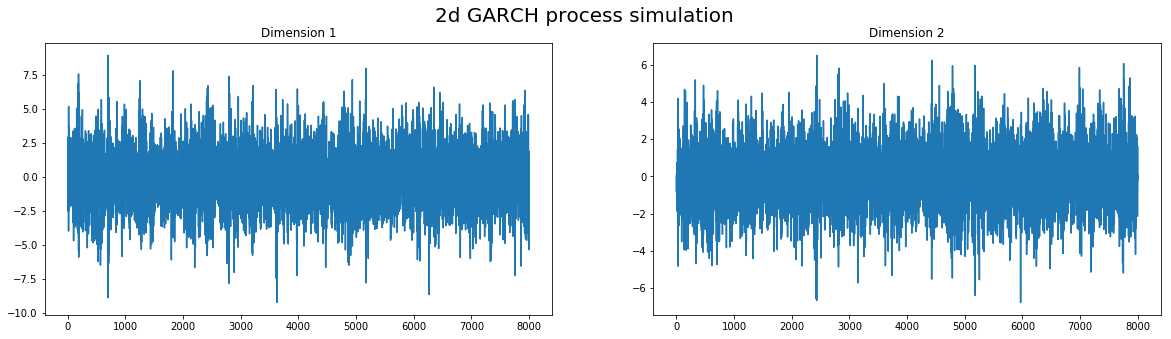

The size of training sample is 4000 and size of test sample is 4000


In [3]:
w = np.array([0.3,0.2])
alpha = np.array([[0.10,0.05],[0.04,0.10]])
beta = np.array([[0.75,0.07],[0.05,0.67]])

y = simulated_GARCH_multi_dim(2,8000,w,alpha,beta)
_, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,5))
plt.suptitle("2d GARCH process simulation",size=20)
ax1.plot(y[0,:])
ax1.title.set_text("Dimension 1")
ax2.plot(y[1,:])
ax2.title.set_text("Dimension 2")
plt.show()

y_in_sample = y[:,:4000]
y_out_sample = y[:,4000:]
print('The size of training sample is',len(y[0,:4000]),'and size of test sample is',len(y[0,4000:]))

In [4]:
def garch_filter(dim,n,w,alpha,beta,data):
    sigma2 = np.zeros((dim,n))
    sigma2[:,0] = [1] * dim
    for i in range(1,n):
        sigma2[:,i] = w + np.dot(alpha,data[:,i-1]**2) + np.dot(beta,sigma2[:,i-1])
    return sigma2

In [5]:
n = len(y_out_sample[0,:])
z = np.zeros((2,n))
sigma2 = garch_filter(2,n,w,alpha,beta,y_out_sample)
for i in range(1,n):
    z[0,i] = stats.norm.cdf(y_out_sample[0,i],loc=0, scale=pow(sigma2[0,i],1/2))
    z[1,i] = stats.norm.cdf(y_out_sample[1,i],loc=0, scale=pow(sigma2[1,i],1/2))

When we compute the probability integral transform, we got now 2 series of $(z_t)_t$, one for each dimension

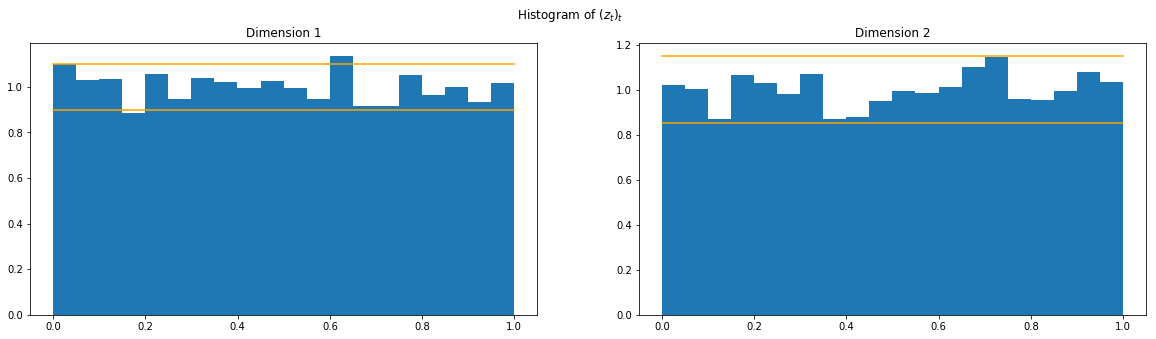

In [6]:
fig,ax = plt.subplots(1, 2,figsize=(20,5))
plt.suptitle("Histogram of $(z_t)_t$")
ax[0].hist(z[0,:],bins=20,density=True)
ax[0].plot([0,1],[1.1,1.1] , color = 'orange')
ax[0].plot([0,1],[0.9,0.9] , color = 'orange')
ax[0].title.set_text("Dimension 1")
ax[1].hist(z[1,:],bins=20,density=True)
ax[1].plot([0,1],[1.15,1.15] , color = 'orange')
ax[1].plot([0,1],[0.85,0.85] , color = 'orange')
ax[1].title.set_text("Dimension 2")
plt.show()

##### Then in 3 dimension

In [7]:
#parameters
w = np.array([0.05,0.04,0.06])
alpha = np.array([[0.06,0.03,0.02],[0.02,0.10,0.04],[0.03,0.03,0.09]])
beta = np.array([[0.70,0.07,0.07],[0.05,0.67,0.02],[0.06,0.07,0.60]])

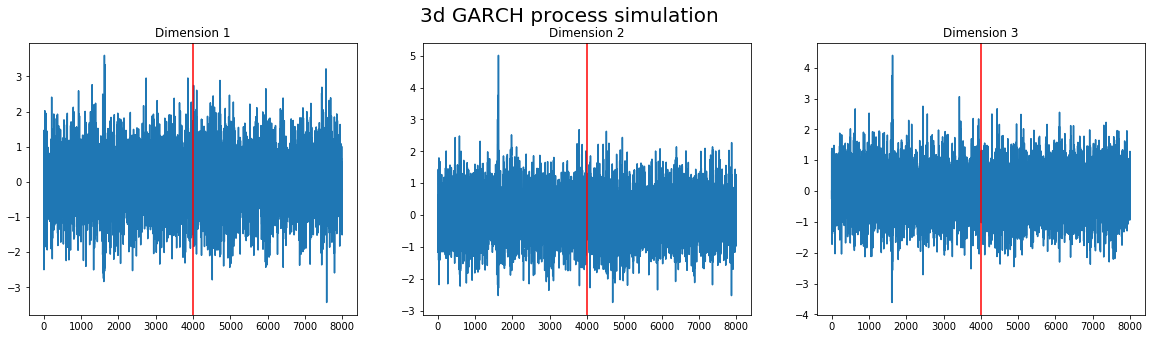

In [8]:
y = simulated_GARCH_multi_dim(3,8000,w,alpha,beta)
_, ax = plt.subplots(1, 3 , figsize=(20,5))
plt.suptitle("3d GARCH process simulation",size=20)
ax[0].plot(y[0,:])
ax[0].title.set_text("Dimension 1")
ax[0].axvline(x=4000,color='red')
ax[1].plot(y[1,:])
ax[1].axvline(x=4000,color='red')
ax[1].title.set_text("Dimension 2")
ax[2].plot(y[2,:])
ax[2].title.set_text("Dimension 3")
ax[2].axvline(x=4000,color='red')
plt.show()

y_in_sample = y[:,:4000]
y_out_sample = y[:,4000:]

In [9]:
n = len(y_out_sample[0,:])
z = np.zeros((3,n))
sigma2 = garch_filter(3,n,w,alpha,beta,y_out_sample)
for i in range(1,n):
    z[0,i] = stats.norm.cdf(y_out_sample[0,i],loc=0, scale=pow(sigma2[0,i],1/2))
    z[1,i] = stats.norm.cdf(y_out_sample[1,i],loc=0, scale=pow(sigma2[1,i],1/2))
    z[2,i] = stats.norm.cdf(y_out_sample[2,i],loc=0, scale=pow(sigma2[2,i],1/2))

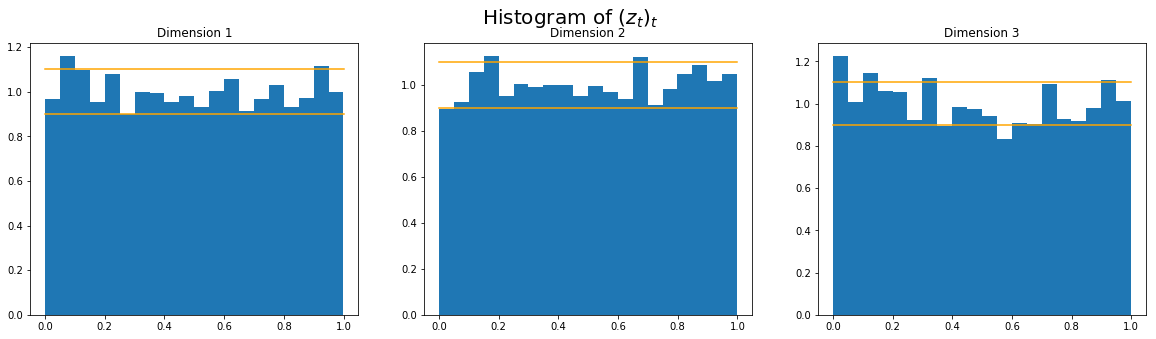

In [10]:
fig,ax = plt.subplots(1, 3,figsize=(20,5))
plt.suptitle("Histogram of $(z_t)_t$",size=20)
ax[0].hist(z[0,:],bins=20,density=True)
ax[0].plot([0,1],[1.1,1.1] , color = 'orange')
ax[0].plot([0,1],[0.9,0.9] , color = 'orange')
ax[0].title.set_text("Dimension 1")
ax[1].hist(z[1,:],bins=20,density=True)
ax[1].plot([0,1],[1.1,1.1] , color = 'orange')
ax[1].plot([0,1],[0.9,0.9] , color = 'orange')
ax[1].title.set_text("Dimension 2")
ax[2].hist(z[2,:],bins=20,density=True)
ax[2].plot([0,1],[1.1,1.1] , color = 'orange')
ax[2].plot([0,1],[0.9,0.9] , color = 'orange')
ax[2].title.set_text("Dimension 3")
plt.show()

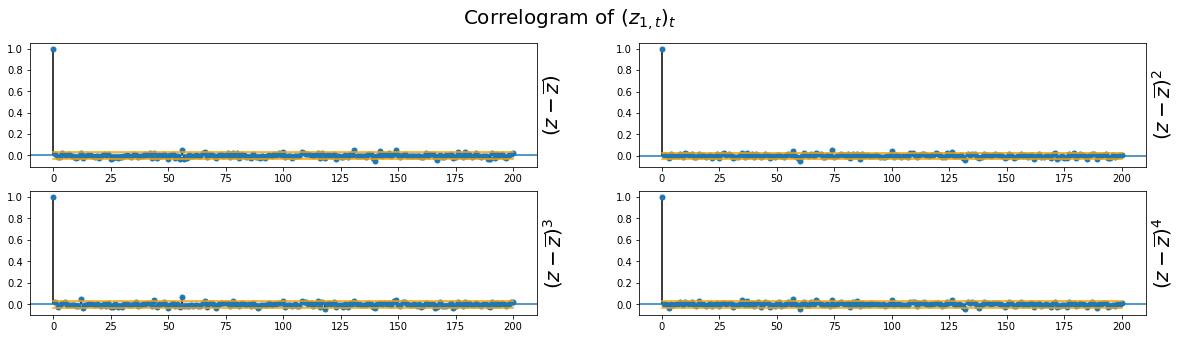

In [11]:
z_mean = sum(z[0,:])/len(z[0,:])
z1 = z[0,:]-z_mean
z2 = pow(z[0,:]-z_mean,2)
z3 = pow(z[0,:]-z_mean,3)
z4 = pow(z[0,:]-z_mean,4)
fig,ax = plt.subplots(nrows = 2, ncols = 2,figsize=(20,5))
plt.suptitle('Correlogram of $(z_{1,t})_t$',size=20)
plot_acf(z1,lags=200,ax=ax[0,0],title="")
ax[0,0].plot([0,200],[1.96/np.sqrt(4000),1.96/np.sqrt(4000)],color='orange')
ax[0,0].plot([0,200],[-1.96/np.sqrt(4000),-1.96/np.sqrt(4000)],color='orange')
ax[0,0].set_ylabel('$(z- \overline{z})$', fontsize = 20 )#ylabel
ax[0,0].yaxis.set_label_position("right")
plot_acf(z2,lags=200,ax=ax[0,1],title="")
ax[0,1].plot([0,200],[1.96/np.sqrt(4000),1.96/np.sqrt(4000)],color='orange')
ax[0,1].plot([0,200],[-1.96/np.sqrt(4000),-1.96/np.sqrt(4000)],color='orange')
ax[0,1].set_ylabel('$(z- \overline{z})^2$', fontsize = 20 )#ylabel
ax[0,1].yaxis.set_label_position("right")
plot_acf(z3,lags=200,ax=ax[1,0],title="")
ax[1,0].plot([0,200],[1.96/np.sqrt(4000),1.96/np.sqrt(4000)],color='orange')
ax[1,0].plot([0,200],[-1.96/np.sqrt(4000),-1.96/np.sqrt(4000)],color='orange')
ax[1,0].set_ylabel('$(z- \overline{z})^3$', fontsize = 20 )#ylabel
ax[1,0].yaxis.set_label_position("right")
plot_acf(z4,lags=200,ax=ax[1,1],title="")
ax[1,1].plot([0,200],[1.96/np.sqrt(4000),1.96/np.sqrt(4000)],color='orange')
ax[1,1].plot([0,200],[-1.96/np.sqrt(4000),-1.96/np.sqrt(4000)],color='orange')
ax[1,1].set_ylabel('$(z- \overline{z})^4$', fontsize = 20 )#ylabel
ax[1,1].yaxis.set_label_position("right")
plt.show()

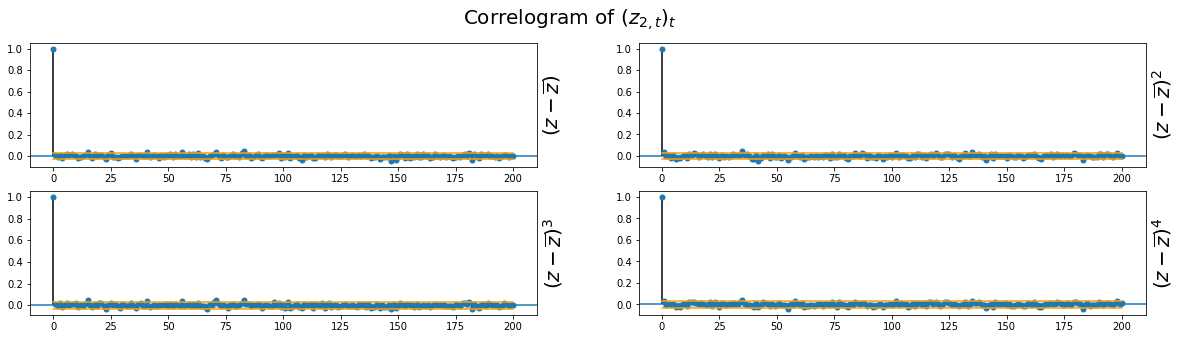

In [12]:
z_mean = sum(z[1,:])/len(z[1,:])
z1 = z[1,:]-z_mean
z2 = pow(z[1,:]-z_mean,2)
z3 = pow(z[1,:]-z_mean,3)
z4 = pow(z[1,:]-z_mean,4)
fig,ax = plt.subplots(nrows = 2, ncols = 2,figsize=(20,5))
plt.suptitle('Correlogram of $(z_{2,t})_t$',size=20)
plot_acf(z1,lags=200,ax=ax[0,0],title="")
ax[0,0].plot([0,200],[1.96/np.sqrt(4000),1.96/np.sqrt(4000)],color='orange')
ax[0,0].plot([0,200],[-1.96/np.sqrt(4000),-1.96/np.sqrt(4000)],color='orange')
ax[0,0].set_ylabel('$(z- \overline{z})$', fontsize = 20 )#ylabel
ax[0,0].yaxis.set_label_position("right")
plot_acf(z2,lags=200,ax=ax[0,1],title="")
ax[0,1].plot([0,200],[1.96/np.sqrt(4000),1.96/np.sqrt(4000)],color='orange')
ax[0,1].plot([0,200],[-1.96/np.sqrt(4000),-1.96/np.sqrt(4000)],color='orange')
ax[0,1].set_ylabel('$(z- \overline{z})^2$', fontsize = 20 )#ylabel
ax[0,1].yaxis.set_label_position("right")
plot_acf(z3,lags=200,ax=ax[1,0],title="")
ax[1,0].plot([0,200],[1.96/np.sqrt(4000),1.96/np.sqrt(4000)],color='orange')
ax[1,0].plot([0,200],[-1.96/np.sqrt(4000),-1.96/np.sqrt(4000)],color='orange')
ax[1,0].set_ylabel('$(z- \overline{z})^3$', fontsize = 20 )#ylabel
ax[1,0].yaxis.set_label_position("right")
plot_acf(z4,lags=200,ax=ax[1,1],title="")
ax[1,1].plot([0,200],[1.96/np.sqrt(4000),1.96/np.sqrt(4000)],color='orange')
ax[1,1].plot([0,200],[-1.96/np.sqrt(4000),-1.96/np.sqrt(4000)],color='orange')
ax[1,1].set_ylabel('$(z- \overline{z})^4$', fontsize = 20 )#ylabel
ax[1,1].yaxis.set_label_position("right")
plt.show()

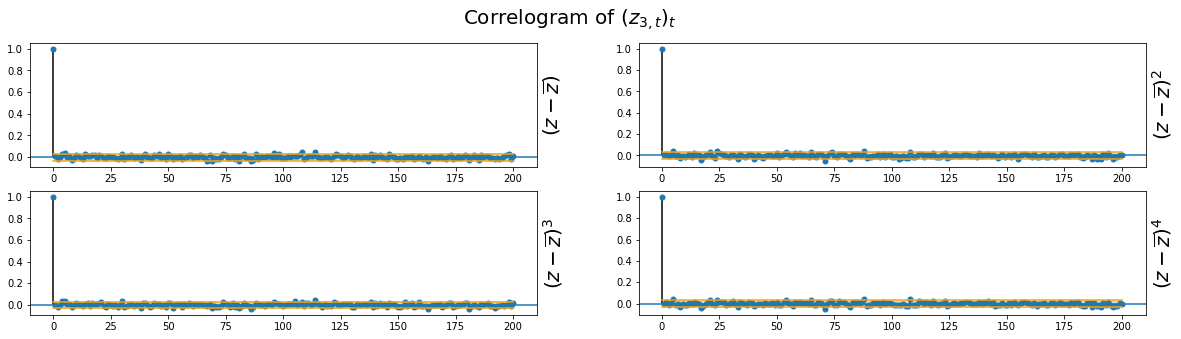

In [13]:
z_mean = sum(z[2,:])/len(z[2,:])
z1 = z[2,:]-z_mean
z2 = pow(z[2,:]-z_mean,2)
z3 = pow(z[2,:]-z_mean,3)
z4 = pow(z[2,:]-z_mean,4)
fig,ax = plt.subplots(nrows = 2, ncols = 2,figsize=(20,5))
plt.suptitle('Correlogram of $(z_{3,t})_t$',size=20)
plot_acf(z1,lags=200,ax=ax[0,0],title="")
ax[0,0].plot([0,200],[1.96/np.sqrt(4000),1.96/np.sqrt(4000)],color='orange')
ax[0,0].plot([0,200],[-1.96/np.sqrt(4000),-1.96/np.sqrt(4000)],color='orange')
ax[0,0].set_ylabel('$(z- \overline{z})$', fontsize = 20 )#ylabel
ax[0,0].yaxis.set_label_position("right")
plot_acf(z2,lags=200,ax=ax[0,1],title="")
ax[0,1].plot([0,200],[1.96/np.sqrt(4000),1.96/np.sqrt(4000)],color='orange')
ax[0,1].plot([0,200],[-1.96/np.sqrt(4000),-1.96/np.sqrt(4000)],color='orange')
ax[0,1].set_ylabel('$(z- \overline{z})^2$', fontsize = 20 )#ylabel
ax[0,1].yaxis.set_label_position("right")
plot_acf(z3,lags=200,ax=ax[1,0],title="")
ax[1,0].plot([0,200],[1.96/np.sqrt(4000),1.96/np.sqrt(4000)],color='orange')
ax[1,0].plot([0,200],[-1.96/np.sqrt(4000),-1.96/np.sqrt(4000)],color='orange')
ax[1,0].set_ylabel('$(z- \overline{z})^3$', fontsize = 20 )#ylabel
ax[1,0].yaxis.set_label_position("right")
plot_acf(z4,lags=200,ax=ax[1,1],title="")
ax[1,1].plot([0,200],[1.96/np.sqrt(4000),1.96/np.sqrt(4000)],color='orange')
ax[1,1].plot([0,200],[-1.96/np.sqrt(4000),-1.96/np.sqrt(4000)],color='orange')
ax[1,1].set_ylabel('$(z- \overline{z})^4$', fontsize = 20 )#ylabel
ax[1,1].yaxis.set_label_position("right")
plt.show()

As we use the same parameters for simulated than for the evaluation we obtain an histogram of a $\mathcal{U}(0,1)$ for each dimension, and the correlogram so that the $(z_t)_t$ are independant

We show that the method works well for multi dimensional framework aswell